In [3]:
import numpy as np
import h5py
import json
import sys
sys.path.append('/home/zhouzb/')
import illustris_python as il
import matplotlib.pyplot as plt


il1_A2list = np.load('/Raid0/zhouzb/localRUN/il1_A2dict(135-68_21part).npy', allow_pickle=1).item()
tng_A2list = np.load('/Raid0/zhouzb/localRUN/tng_A2dict(99-33_21part).npy', allow_pickle=1).item()

il1_barID = np.load('/Raid0/zhouzb/localRUN/barredID_il1.npy')
il1_diskID = np.load('/Raid0/zhouzb/localRUN/diskID_il1.npy')

tng_barID = np.load('/Raid0/zhouzb/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('/Raid0/zhouzb/localRUN/diskID_4WP.npy')

In [70]:
tng_zformation = np.load('/Raid0/zhouzb/localRUN/tng_zformation.npy', allow_pickle=1).item()
il1_zformation = np.load('/Raid0/zhouzb/localRUN/il1_zformation.npy', allow_pickle=1).item()

In [5]:
tng_snap = np.array([99, 91, 84, 78, 72, 67, 63, 59, 56, 53, 50, 47, 45, 43, 41, 40, 38, 36, 35, 34, 33])
Redshift = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

In [6]:
aa = tng_barID[0]

In [8]:
tng_A2list[aa]

array([0.17461233, 0.12699274, 0.09795389, 0.56741239, 0.25807324,
       0.26940217, 0.31126055, 0.17767547, 0.27498113, 0.210583  ,
       0.16206333, 0.19232765, 0.19427776, 0.19621449, 0.21827497,
       0.22421759, 0.25874337, 0.15420614, 0.07196004, 0.07766164,
       0.07837427])

In [12]:
def a2WithRS(haloID, savedir):
    plt.plot(Redshift, tng_A2list[haloID], label='%d'%haloID)
    plt.savefig(savedir+'/%d.png'%haloID, dpi=200)
    plt.close()

In [13]:
savedir = '/Raid0/zhouzb/TNG/A2RSfig/'

In [15]:
haloID = tng_barID[0]
a2WithRS(haloID, savedir)

In [16]:
for haloID in tng_barID:
    a2WithRS(haloID, savedir)

In [17]:
def zbar(haloID, A2list):
    #return bar origin redshift
    Redshift = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
    A2 = np.array(A2list[haloID])
    z=0
    for i in range(1,len(Redshift)): 
        if A2[i] < 0.15:
            break
        z += 1
    while z != 0:
        if abs((A2[z] - A2[z - 1]) / A2[z]) <= 0.4:
            break
        z -= 1
    return Redshift[z]

In [21]:
zbar(467958, tng_A2list)

0.4

In [20]:
tng_A2list[467958]

array([0.21841344, 0.22114204, 0.21166524, 0.21013947, 0.17508275,
       0.13767766, 0.13506767, 0.1414131 , 0.12825407, 0.14801735,
       0.0950026 , 0.1034761 , 0.06792848, 0.12609587, 0.06826385,
       0.11231074, 0.07394929, 0.09506162, 0.08976046, 0.14671438,
       0.10285624])

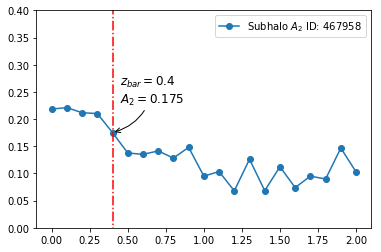

In [45]:
haloID = 467958
plt.plot(Redshift, tng_A2list[haloID], label=r'Subhalo $A_2$ ID: %d'%haloID, marker = 'o')
plt.plot(np.ones(10) * 0.4, np.linspace(-0.1, 0.6, 10), c='r', ls='-.')
plt.ylim(0, 0.4)
plt.annotate(r'$z_{bar} = 0.4$' + '\n' + r'$A_2 = 0.175$',
                xy=(0.4, tng_A2list[haloID][4]),
                xytext=(0.45, 0.23),
                fontsize=12,
                arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=-0.3"))
plt.legend()

In [43]:
tng_A2list[haloID]

array([0.35200554, 0.34132375, 0.32381193, 0.26436701, 0.24776935,
       0.21641115, 0.14609703, 0.08096203, 0.14747901, 0.0703372 ,
       0.09607121, 0.09856401, 0.11147772, 0.10496957, 0.17066485,
       0.09509494, 0.09243366, 0.09787872, 0.15127165, 0.21380565,
       0.22471769])

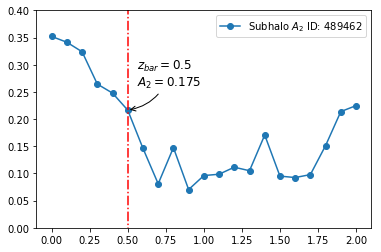

In [48]:
haloID = 489462
zb = zbar(haloID, tng_A2list)
plt.plot(Redshift, tng_A2list[haloID], label=r'Subhalo $A_2$ ID: %d'%haloID, marker = 'o')
plt.plot(np.ones(10) * zb, np.linspace(-0.1, 0.6, 10), c='r', ls='-.')
plt.ylim(0, 0.4)
plt.annotate(r'$z_{bar} = 0.5$' + '\n' + r'$A_2 = 0.175$',
                xy=(zb, tng_A2list[haloID][5]),
                xytext=(0.56, 0.26),
                fontsize=12,
                arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=-0.3"))
plt.legend()

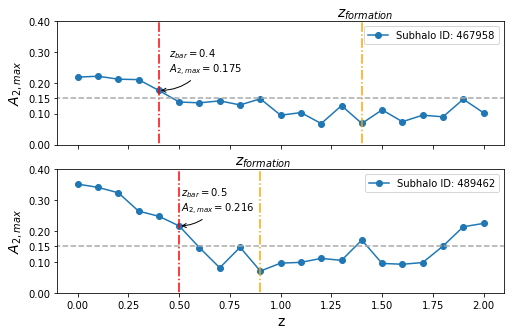

In [85]:
fig, axs = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(8,5))
haloID = 467958
axs[0].plot(Redshift, tng_A2list[haloID], label=r'Subhalo ID: %d'%haloID, marker = 'o')
axs[0].plot(np.ones(10) * 0.4, np.linspace(-0.1, 0.6, 10), c='r', ls='-.')
axs[0].plot(np.ones(10) * tng_zformation[haloID], np.linspace(-0.1, 0.6, 10), c='orange', ls='-.')
axs[0].plot(np.linspace(-1, 3, 10), np.ones(10) * 0.15, c = 'darkgray', ls='--')
axs[0].set_ylim(0, 0.4)
axs[0].text
axs[0].annotate(r'$z_{formation}$', (tng_zformation[haloID], 0.4), xytext = (-25, 4.55), textcoords = 'offset points', fontsize=14)
axs[0].annotate(r'$z_{bar} = 0.4$' + '\n' + r'$A_{2,max} = 0.175$',
                xy=(0.4, tng_A2list[haloID][4]),
                xytext=(0.45, 0.23),
                fontsize=10,
                arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=-0.3"))
axs[0].legend()

haloID = 489462
zb = zbar(haloID, tng_A2list)
axs[1].plot(Redshift, tng_A2list[haloID], label=r'Subhalo ID: %d'%haloID, marker = 'o')
axs[1].plot(np.ones(10) * zb, np.linspace(-0.1, 0.6, 10), c='r', ls='-.')
axs[1].plot(np.ones(10) * tng_zformation[haloID], np.linspace(-0.1, 0.6, 10), c='orange', ls='-.')
axs[1].plot(np.linspace(-1, 3, 10), np.ones(10) * 0.15, c = 'darkgray', ls='--')
axs[1].set_ylim(0, 0.4)
axs[1].annotate(r'$z_{formation}$', (tng_zformation[haloID], 0.4), xytext = (-25, 4.55), textcoords = 'offset points', fontsize=14)
axs[1].annotate(r'$z_{bar} = 0.5$' + '\n' + r'$A_{2,max} = $' + '%.3f'%tng_A2list[haloID][5],
                xy=(zb, tng_A2list[haloID][5]),
                xytext=(0.51, 0.26),
                fontsize=10,
                arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=-0.3"))

axs[0].set_yticks([0, 0.1, 0.15, 0.2, 0.3, 0.4])
axs[1].set_yticks([0, 0.1, 0.15, 0.2, 0.3, 0.4])
axs[1].set_xlim(-0.1, 2.1)
axs[1].legend()
axs[0].set_ylabel(r'$A_{2,max}$', fontsize=14)
axs[1].set_ylabel(r'$A_{2,max}$', fontsize=14)
axs[1].set_xlabel('z', fontsize=14)

# plt.savefig('/Raid0/zhouzb/local_result/A2_Redshift.pdf')
plt.savefig('/home/zhouzb/jupyter/pdfPlot/figs/A2_Redshift.png')